In [1]:
# Importo mi Clase con las constantes declaradas con las rutas y algunos mensajes que utilizare 
from Business.constantes import MagicString
from Business.business_logic_general import General

In [2]:
# Lectura de nuestro recurso CSV.
Datos = General.leer_datos_csv(MagicString.WINE_RUTA)

In [3]:
# Realizo la lectura de los datos para el analisis exploratorio
General.realizar_lectura_datos_analisis(Datos.copy(),MagicString.CONFIGURACION_GENERAL_CANTIDAD_REGISTROS)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,1,0,2,0,11,34,1,4,1,9,5
1,8,1,0,3,0,25,67,1,3,1,10,5
2,8,1,0,2,0,15,54,1,3,1,10,5
3,11,0,1,2,0,17,60,1,3,1,10,6
5,7,1,0,2,0,13,40,1,4,1,9,5


In [4]:
General.describir_datos_csv(Datos.copy())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
mean,8,1,0,3,0,16,47,1,3,1,10,6
std,2,0,0,1,0,10,33,0,0,0,1,1
min,5,0,0,1,0,1,6,1,3,0,8,3
25%,7,0,0,2,0,7,22,1,3,1,10,5
50%,8,1,0,2,0,14,38,1,3,1,10,6
75%,9,1,0,3,0,21,63,1,3,1,11,6
max,16,2,1,16,1,72,289,1,4,2,15,8


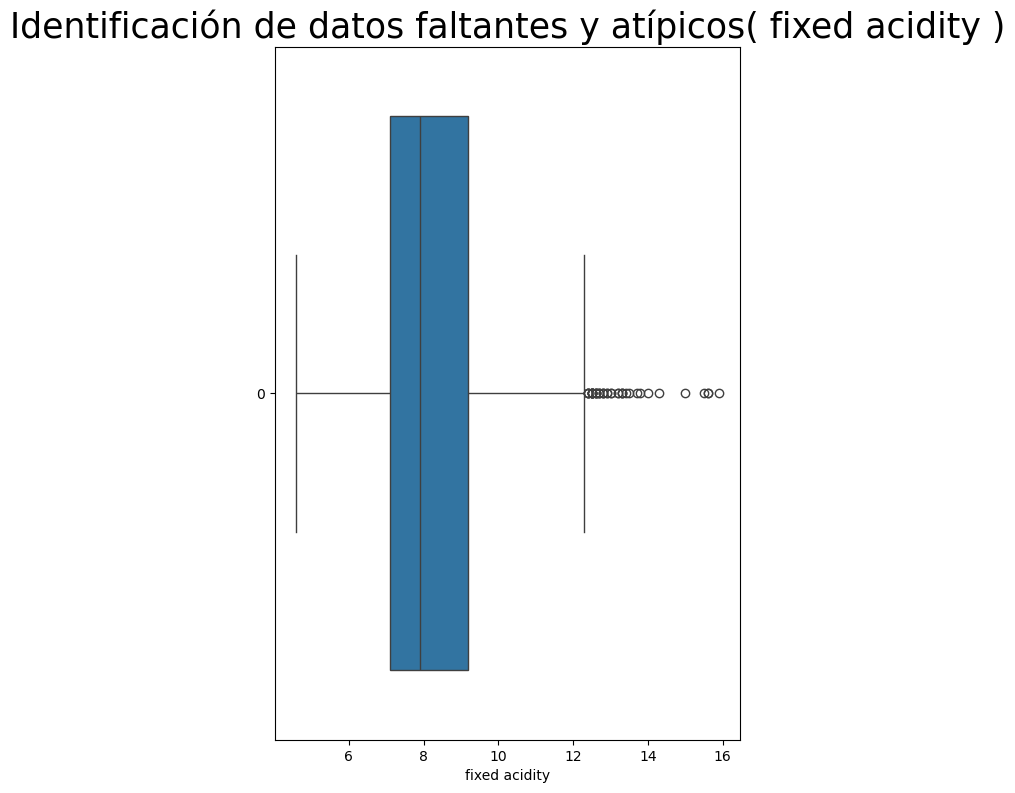

In [5]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.WINE_FIXED_ACIDITY, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.WINE_FIXED_ACIDITY))

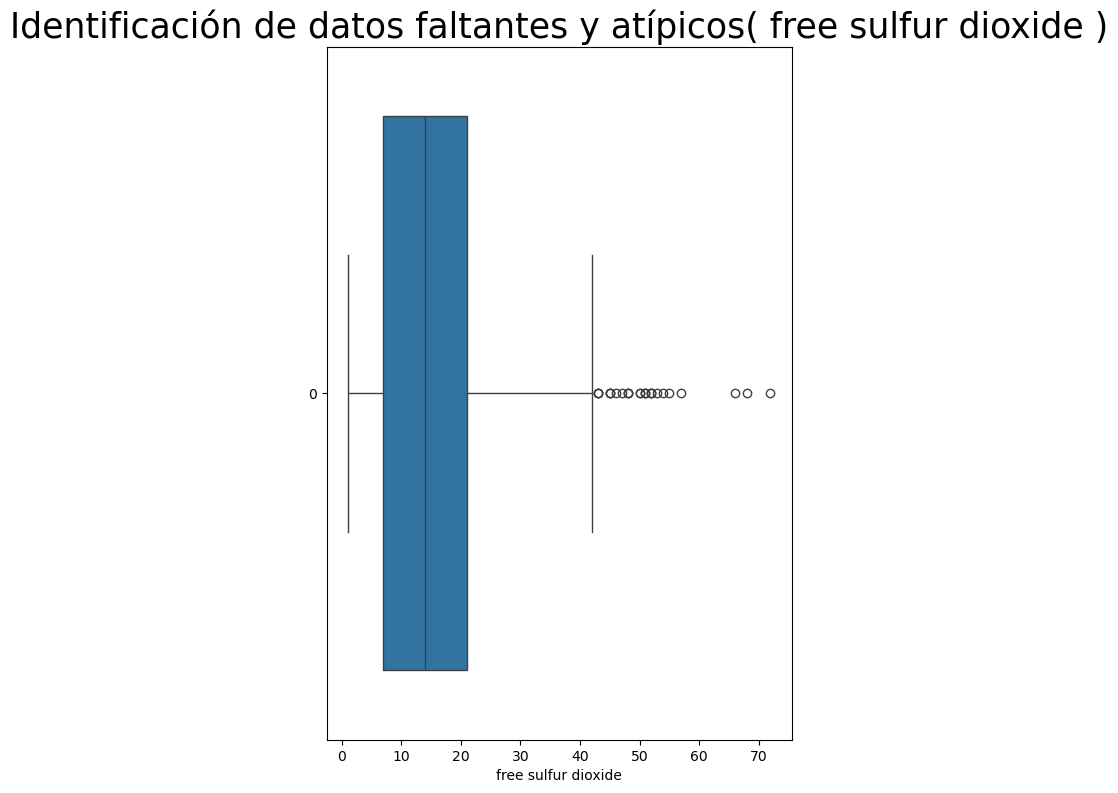

In [6]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.WINE_FREE_SULFUR_DIOXIDE, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.WINE_FREE_SULFUR_DIOXIDE))

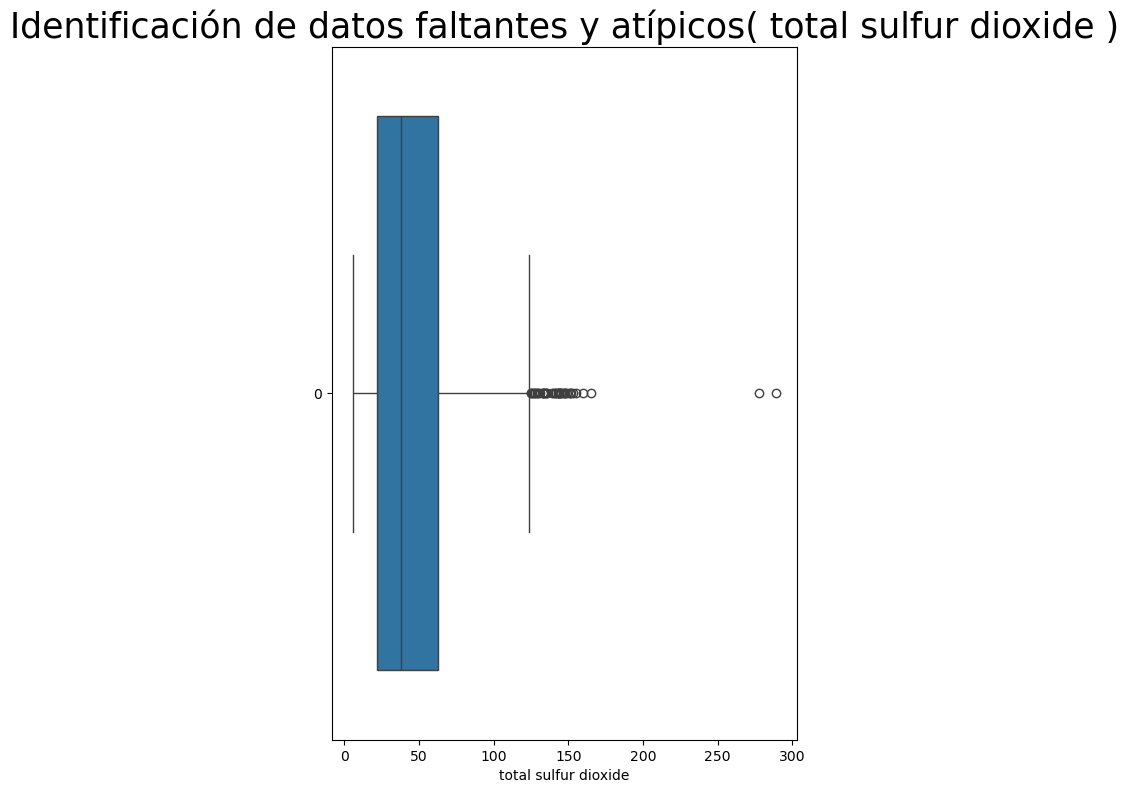

In [7]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.WINE_TOTAL_SULFUR_DIOXIDE, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.WINE_TOTAL_SULFUR_DIOXIDE))

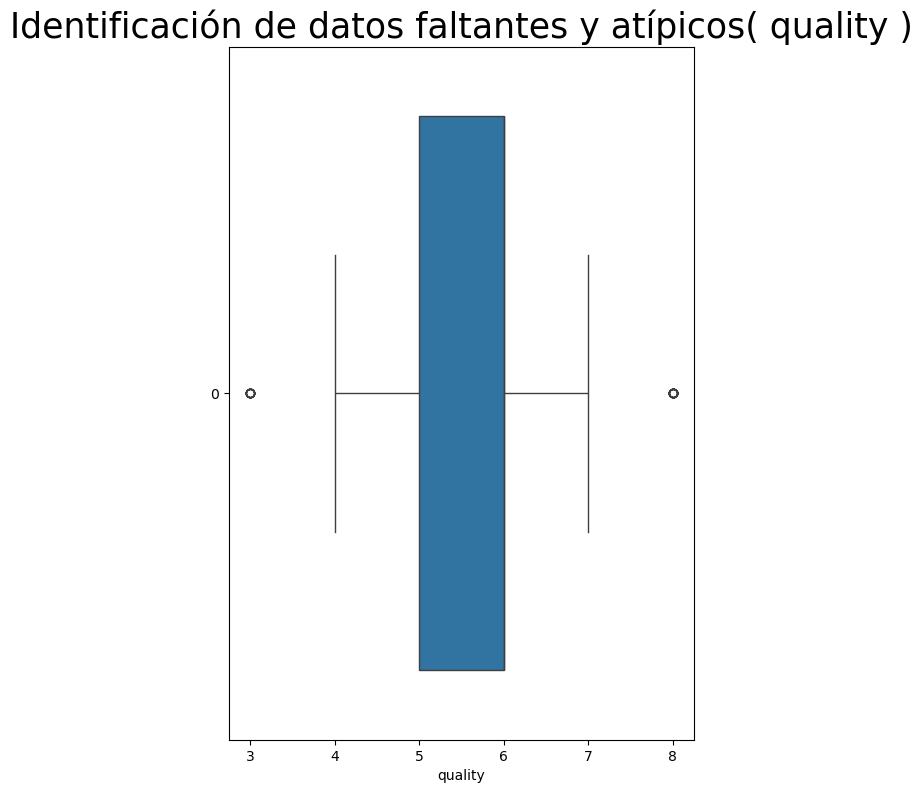

In [8]:
General.generar_grafica_datos_obtenidos(Datos.copy(),MagicString.WINE_QUALITY, MagicString.MENSAJE_VALORES_ATIPICOS.format(MagicString.WINE_QUALITY))

In [9]:
#Ajusto Los valores atipicos de la columna 
Datos_para_entrenamiento = Datos.copy()
Datos_para_entrenamiento[MagicString.WINE_FIXED_ACIDITY] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos_para_entrenamiento.copy(),MagicString.WINE_FIXED_ACIDITY)
Datos_para_entrenamiento[MagicString.WINE_FREE_SULFUR_DIOXIDE] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos_para_entrenamiento.copy(),MagicString.WINE_FREE_SULFUR_DIOXIDE)
Datos_para_entrenamiento[MagicString.WINE_TOTAL_SULFUR_DIOXIDE] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos_para_entrenamiento.copy(),MagicString.WINE_TOTAL_SULFUR_DIOXIDE)
Datos_para_entrenamiento[MagicString.WINE_QUALITY] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos_para_entrenamiento.copy(),MagicString.WINE_QUALITY)

#Compruebo si existen datos nulos en el DataFrame
Datos_para_entrenamiento.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

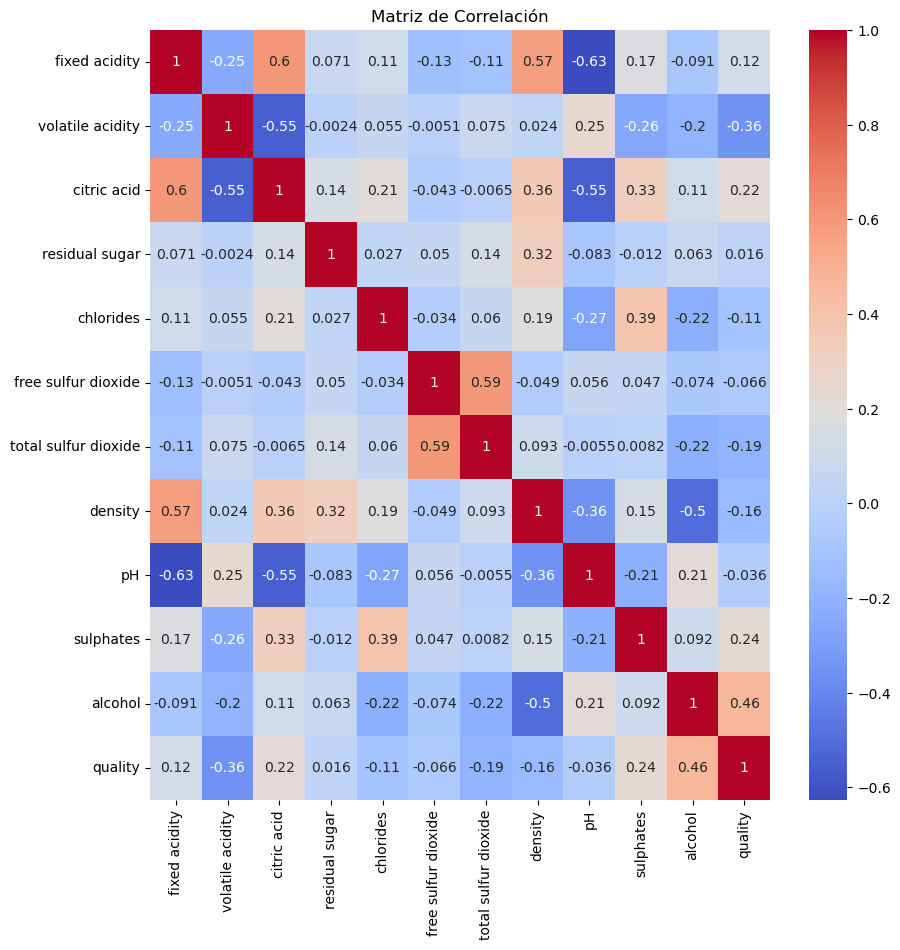

In [10]:
#Generar matriz de correlacion
General.genera_grafica_de_correlacion(Datos_para_entrenamiento)

In [11]:
# Utilizo los siguientes porcentajes para entrenamiento Train = 80% y Test = 20% tomando como referencia la columna quality
Datos_generar_arbol = Datos_para_entrenamiento[[MagicString.WINE_PH, MagicString.WINE_ALCOHOL, MagicString.WINE_QUALITY]]

quality_train_x, quality_test_x, quality_train_y, quality_test_y = General.dividir_registros_train_y_test(Datos_para_entrenamiento, MagicString.WINE_QUALITY, 0)

              precision    recall  f1-score   support

           4       0.09      0.14      0.11         7
           5       0.57      0.53      0.55       113
           6       0.39      0.39      0.39       114
           7       0.32      0.34      0.33        38

    accuracy                           0.44       272
   macro avg       0.34      0.35      0.35       272
weighted avg       0.45      0.44      0.44       272



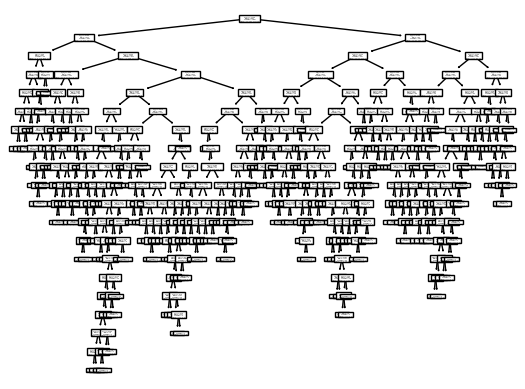

In [12]:
General.generar_arbol_de_decision(quality_train_x, quality_train_y, quality_test_x, quality_test_y)